In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/european_co2_last5years.csv')

# Filter for only needed columns ('country', 'year', 'population', 'co2' (million tonnes), 'co2_per_capita')

relevant_columns = ['country', 'year', 'population', 'co2', 'co2_per_capita']

filtered_df = df[relevant_columns]
filtered_df.head()


,country,year,population,co2,co2_per_capita
0,Albania,2019,2885012.0,4.827,1.673
1,Albania,2020,2871951.0,4.711,1.640
2,Albania,2021,2849643.0,5.134,1.802
3,Albania,2022,2827615.0,5.173,1.830
4,Albania,2023,2811660.0,5.144,1.830
...,...,...,...,...,...
245,Vatican,2019,543.0,NaN,NaN
246,Vatican,2020,536.0,NaN,NaN
247,Vatican,2021,527.0,NaN,NaN
248,Vatican,2022,513.0,NaN,NaN


In [3]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 250 rows, 5 columns


In [4]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')

There are 50 countries in the dataset
Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Kazakhstan' 'Kosovo' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco'
 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'Vatican']


In [5]:
filtered_df.describe()

,year,population,co2,co2_per_capita
count,250.000000,2.500000e+02,235.000000,235.000000
mean,2021.000000,1.723138e+07,124.409953,5.703970
std,1.417051,2.883240e+07,274.324174,2.518651
min,2019.000000,5.010000e+02,0.142000,1.640000
25%,2020.000000,1.856337e+06,8.383500,3.965000
50%,2021.000000,5.520460e+06,36.703000,5.091000
75%,2022.000000,1.156316e+07,86.185000,6.819500
max,2023.000000,1.465331e+08,1815.925000,15.741000


country            0
year               0
population         0
co2               15
co2_per_capita    15
dtype: int64

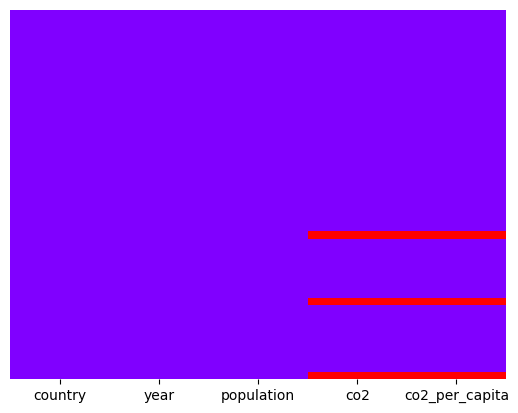

In [7]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [8]:
# Find rows with  null values
null_co2_rows = filtered_df[filtered_df['co2'].isnull()]

# Display rows with null values
print("Rows with null 'co2':")
print(null_co2_rows)

# RESULT: Monaco, San Marino, Vatican -> Drop


Rows with null 'co2':
        country  year  population  co2  co2_per_capita
150      Monaco  2019     38131.0  NaN             NaN
151      Monaco  2020     38074.0  NaN             NaN
152      Monaco  2021     38548.0  NaN             NaN
153      Monaco  2022     38949.0  NaN             NaN
154      Monaco  2023     38978.0  NaN             NaN
195  San Marino  2019     34674.0  NaN             NaN
196  San Marino  2020     34796.0  NaN             NaN
197  San Marino  2021     34599.0  NaN             NaN
198  San Marino  2022     34113.0  NaN             NaN
199  San Marino  2023     33761.0  NaN             NaN
245     Vatican  2019       543.0  NaN             NaN
246     Vatican  2020       536.0  NaN             NaN
247     Vatican  2021       527.0  NaN             NaN
248     Vatican  2022       513.0  NaN             NaN
249     Vatican  2023       501.0  NaN             NaN


In [9]:
# Drop rows for Monaco, San Marino, Vatican
countries_to_drop = ['Monaco', 'San Marino', 'Vatican']

filtered_df_w_dropped_countries = filtered_df[~filtered_df['country'].isin(countries_to_drop)]
filtered_df_w_dropped_countries.tail()


,country,year,population,co2,co2_per_capita
240,United Kingdom,2019,67110958.0,364.753,5.435
241,United Kingdom,2020,67351860.0,326.263,4.844
242,United Kingdom,2021,67668789.0,344.510,5.091
243,United Kingdom,2022,68179315.0,313.835,4.603
244,United Kingdom,2023,68682965.0,305.146,4.443


In [31]:
print(f'Data shape after dropping 3 countries (rows, columns): {filtered_df_w_dropped_countries.shape}')

Data shape after dropping 3 countries (rows, columns): (235, 5)


In [18]:
unique_values_count = filtered_df_w_dropped_countries['country'].nunique()
print(f'{unique_values_count}')

47


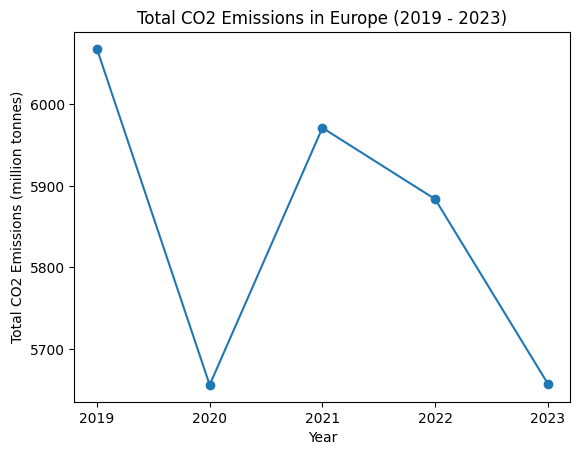

In [19]:
# TREND ANALYSIS OVER TIME - TOTAL CO2 EMISSIONS OVER THE YEARS

yearly_co2 = filtered_df_w_dropped_countries.groupby('year')['co2'].sum()
plt.plot(yearly_co2.index, yearly_co2.values, marker='o')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('Total CO2 Emissions in Europe (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million tonnes)')
plt.show()


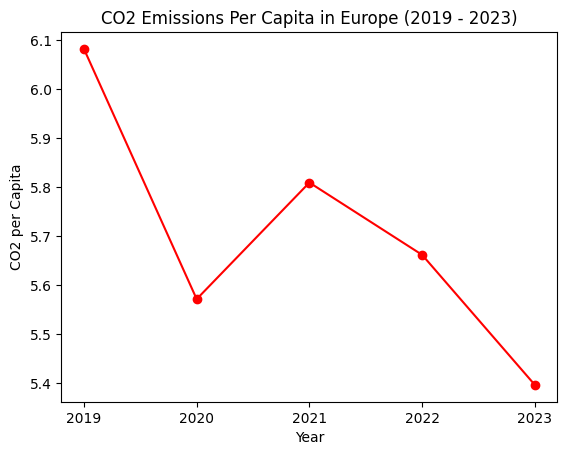

In [22]:
# TREND ANALYSIS OVER TIME - CO2 EMISSIONS PER CAPITA THE YEARS

yearly_co2_per_capita = filtered_df_w_dropped_countries.groupby('year')['co2_per_capita'].mean()
plt.plot(yearly_co2_per_capita.index, yearly_co2_per_capita.values, marker='o', color='red')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('CO2 Emissions Per Capita in Europe (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('CO2 per Capita')
plt.show()

            country       co2
194          Russia  1815.925
84          Germany   596.151
234          Turkey   432.077
109           Italy   313.461
244  United Kingdom   305.146
179          Poland   289.282
74           France   272.476
114      Kazakhstan   255.161
219           Spain   221.616
239         Ukraine   136.461


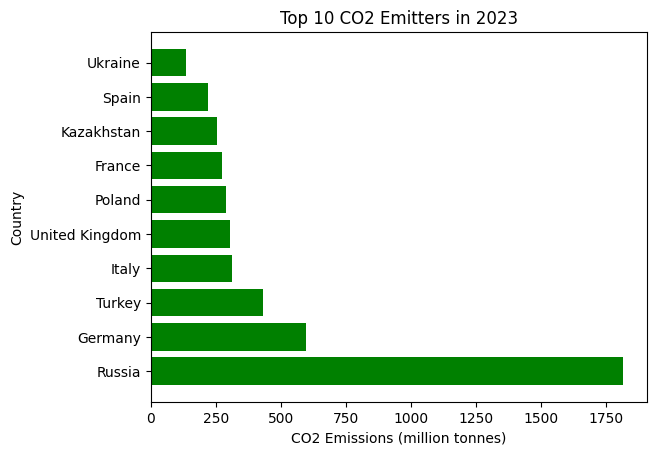

In [21]:
# TOP CO2 EMISSIONS IN 2023

data_2023 = filtered_df_w_dropped_countries[filtered_df_w_dropped_countries['year'] == 2023]

# Sort countries by CO2 emissions in 2023
top_emitters = data_2023[['country', 'co2']].sort_values(by='co2', ascending=False)

# Display the top 10 emitters in 2023
print(top_emitters.head(10))

# Plot the top 10 emitters
plt.barh(top_emitters['country'][:10], top_emitters['co2'][:10], color='green')
plt.title('Top 10 CO2 Emitters in 2023')
plt.xlabel('CO2 Emissions (million tonnes)')
plt.ylabel('Country')
plt.show()



        country  co2_per_capita
114  Kazakhstan          12.551
194      Russia          12.486
139  Luxembourg          10.514
99      Iceland           9.708
179      Poland           7.463
64      Estonia           7.328
34      Belgium           7.118
84      Germany           7.051
174      Norway           7.048
104     Ireland           6.626


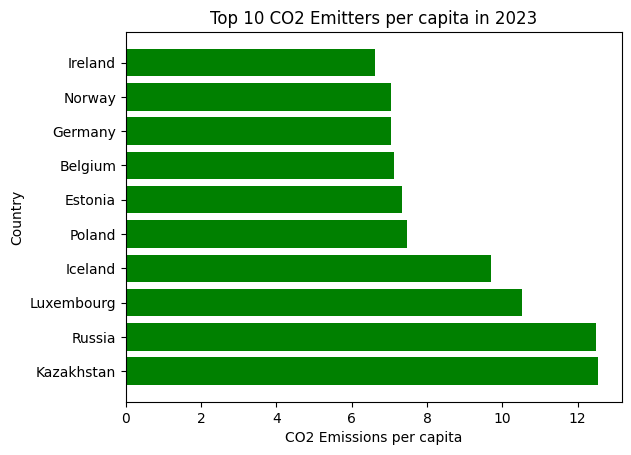

In [16]:
# TOP CO2 EMISSIONS PER CAPITA IN 2023

data_2023 = filtered_df_w_dropped_countries[filtered_df_w_dropped_countries['year'] == 2023]

# Sort countries by CO2 emissions in 2023
top_emitters = data_2023[['country', 'co2_per_capita']].sort_values(by='co2_per_capita', ascending=False)

# Display the top 10 emitters in 2023
print(top_emitters.head(10))

# Plot the top 10 emitters
plt.barh(top_emitters['country'][:10], top_emitters['co2_per_capita'][:10], color='green')
plt.title('Top 10 CO2 Emitters per capita in 2023')
plt.xlabel('CO2 Emissions per capita')
plt.ylabel('Country')
plt.show()

In [17]:
# CO2 sustainability score - lower emissions per capita -> better sustainability (CO2 per capita)

# Group by country and calculate the average CO2 per capita over all years
avg_co2_per_country = filtered_df_w_dropped_countries.groupby('country')['co2_per_capita'].mean().reset_index()

#  Normalize the average values (0 = worst, 1 = best)
max_val = avg_co2_per_country['co2_per_capita'].max()
min_val = avg_co2_per_country['co2_per_capita'].min()

avg_co2_per_country['co2_subindex'] = (max_val - avg_co2_per_country['co2_per_capita']) / (max_val - min_val)

# Sort
avg_co2_per_country.sort_values(by='co2_subindex', ascending=False)



,country,co2_per_capita,co2_subindex
0,Albania,1.7550,1.000000
29,Moldova,1.8512,0.991538
2,Armenia,2.4342,0.940256
15,Georgia,2.9422,0.895572
28,Malta,3.2416,0.869236
42,Sweden,3.6528,0.833067
24,Latvia,3.6990,0.829003
36,Romania,3.8226,0.818131
25,Liechtenstein,3.8272,0.817726
32,North Macedonia,3.8386,0.816723


In [70]:
# Save the filtered data
avg_co2_per_country.to_csv('../data_subindex/subindex_european_co2_2019-2023.csv', index=False)

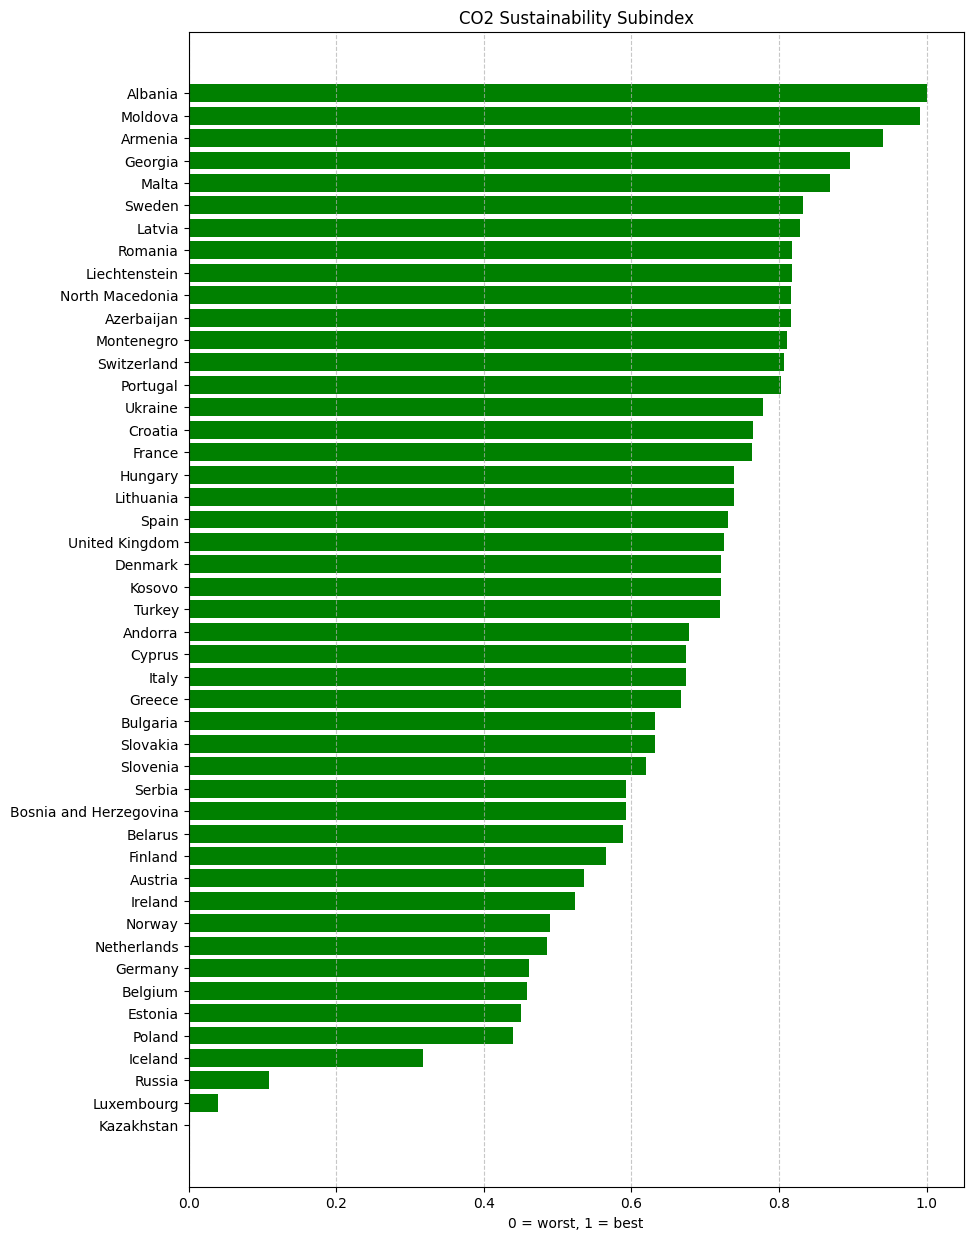

In [72]:
# Plot
avg_co2_per_country = avg_co2_per_country.sort_values(by='co2_subindex')

plt.figure(figsize=(10, 15))
plt.barh(avg_co2_per_country['country'], avg_co2_per_country['co2_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('CO2 Sustainability Subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
